<div style="border:2px solid black; padding:10px">
    
# <font color="blue">Objective: </font>Data extraction, transformation, loading, and exploring pipeline
</div>

# Import Dependencies

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
import numpy as np

# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

<hr style="border-top: 2px solid black;">

# Import Data

 - Better Life Index data from the Organisation for Economic Co-operation and Development (OECD) website
 - Website: https://stats.oecd.org/index.aspx?DataSetCode=BLI
 - Gross domestic product (GDP) per capita in 2015 from the International Monetary Fund
 - Website: https://homl.info/5

In [2]:
better_life_index_file ="bli_oecd.csv"
# Only import necessary columns from bli dataset
bli_df = pd.read_csv(better_life_index_file, usecols=['LOCATION', 'Country', 'Indicator', 'Inequality', 'Value'])
gdp_file = 'gdp_data.csv'
dfp_df = pd.read_csv(gdp_file)

<hr style="border-top: 2px solid black;">

# Inspect Dataframes

In [3]:
print('The shape for the {} dataframes is: {}'.format('Better Life Index', bli_df.shape))
print('The shape for the {} dataframes is: {}'.format('GDP', dfp_df.shape))

The shape for the Better Life Index dataframes is: (2369, 5)
The shape for the GDP dataframes is: (189, 2)


<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>
There are more countries listed in the BLI dataframe thant here are in the gdp country dataframe
</div>

<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>
 - Only care about Indicator = "Life satisfaction" and Inequality = "Total"
 - Will filter for those conditions
</div>

In [4]:
# Update dataframe
bli_df = bli_df[bli_df.Indicator.str.contains('Life satisfaction') & bli_df.Inequality.str.contains('Total')]

In [5]:
# Inspect data
print('''The number of unique values in the Indicator column is {}, \nand the number of unique values in the Inequality column is {} 
      '''.format(len(bli_df.Indicator.unique()), len(bli_df.Inequality.unique())))

The number of unique values in the Indicator column is 1, 
and the number of unique values in the Inequality column is 1 
      


<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>
Successfully filtered BLI data.
</div>

# Merge Dataframes using <code>Dataframe.merge()</code>
 - Documentation as of 5/16/20: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [6]:
df = bli_df.merge(dfp_df, how="left", on="Country")

In [7]:
# Clean data, drop uncessary columns
not_needed = ['Indicator', 'Inequality']
# Drop columns that are not necessary
df.drop(not_needed, axis=1, inplace=True)
# Drop row with missing value
df.dropna(inplace=True)

<hr style="border-top: 2px solid black;">

# Visualize the Data

### Prepare Data for plotting and linear regression

 - np.c_ method translates slice objects to concatenation along the second axis.
 - Stack 1-D arrays as columns into a 2-D array.
 - Documentation as of 5/16/20: https://numpy.org/devdocs/reference/generated/numpy.c_.html
 - This is important for matrix calculations

In [8]:
# Translates slice objects to concatenation along the second axis.
# Data for plotting
X = np.c_[df["GDP"]]
y = np.c_[df["Value"]]
labels = df.Country
# To mark US datapoint
us_data = df[df.Country == 'United States']

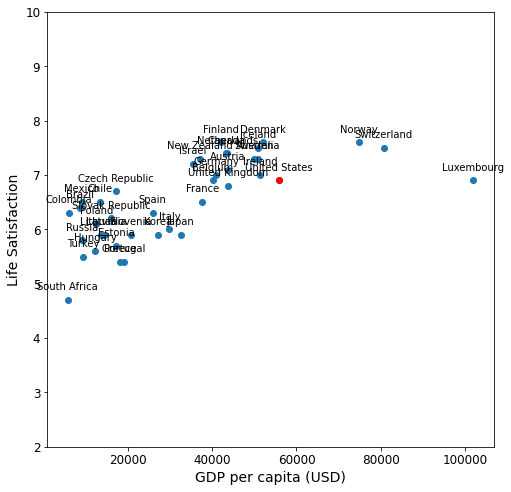

In [9]:
fig, axes = plt.subplots(1,1, figsize=(8,8))
axes.set_xlabel('GDP per capita (USD)', fontsize = 14)
axes.set_ylabel('Life Satisfaction', fontsize = 14)
axes.set_ylim(2, 10)
plt.scatter(X, y, axes=axes)
plt.scatter(us_data.GDP, us_data.Value, color='red', axes=axes)

# zip joins x and y coordinates in pairs
for xs, ys, label in zip(X,y,labels):
    
    plt.annotate(label, # this is the text
                 (xs,ys), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>
There seems to be a trend, as GPD increases, so does the life satisfaction score.<br>
The US is in red.<br>
</div>

<hr style="border-top: 2px solid black;">

In [10]:
# Store data
%store df
%store X
%store y

Stored 'df' (DataFrame)
Stored 'X' (ndarray)
Stored 'y' (ndarray)
